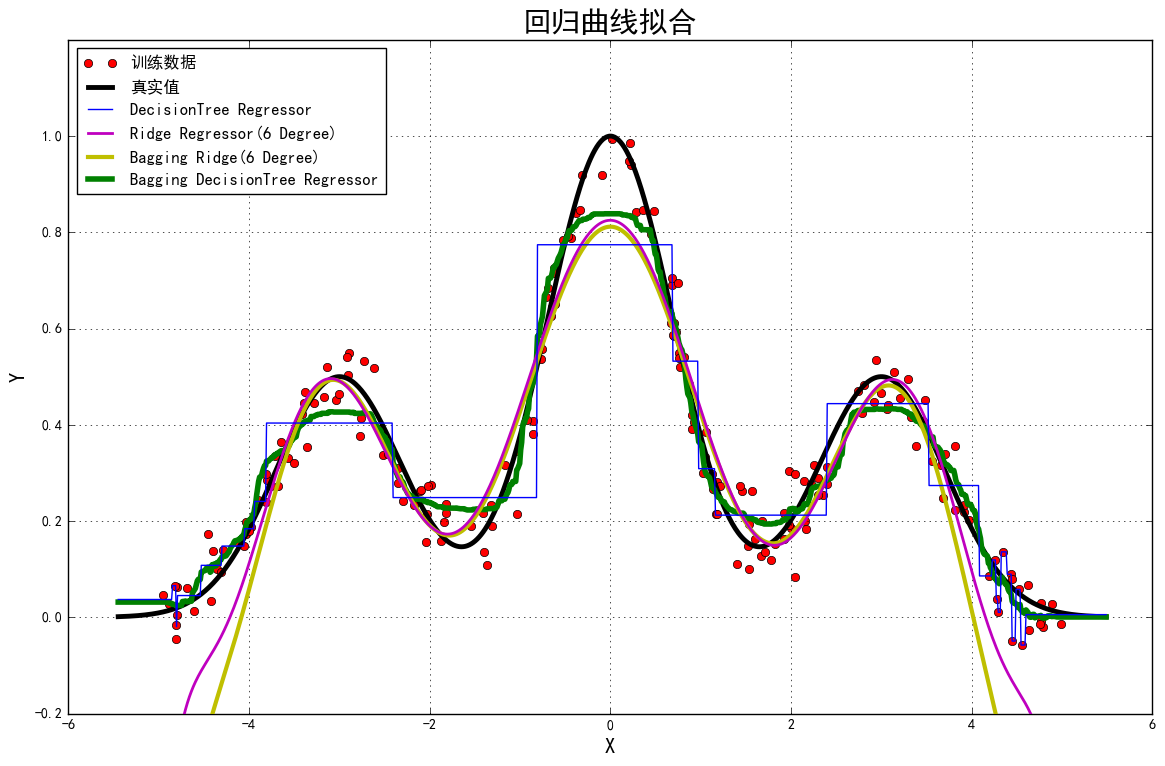

In [2]:
# /usr/bin/python
# -*- encoding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def f(x):
    return 0.5*np.exp(-(x+3) **2) + np.exp(-x**2) + + 0.5*np.exp(-(x-3) ** 2)


if __name__ == "__main__":
    np.random.seed(0)
    N = 200
    x = np.random.rand(N) * 10 - 5  # [-5,5)
#    x = np.sort(x)
    y = f(x) + 0.05*np.random.randn(N)
    x.shape = -1, 1

    ridge = RidgeCV(alphas=np.logspace(-3, 2, 10), fit_intercept=False)
    ridged = Pipeline([('poly', PolynomialFeatures(degree=10)), ('Ridge', ridge)])
    bagging_ridged = BaggingRegressor(ridged, n_estimators=100, max_samples=0.3)
    dtr = DecisionTreeRegressor(max_depth=5)
    regs = [
        ('DecisionTree Regressor', dtr),
        ('Ridge Regressor(6 Degree)', ridged),
        ('Bagging Ridge(6 Degree)', bagging_ridged),
        ('Bagging DecisionTree Regressor', BaggingRegressor(dtr, n_estimators=100, max_samples=0.3))]
    x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.plot(x, y, 'ro', label=u'训练数据')
    plt.plot(x_test, f(x_test), color='k', lw=3.5, label=u'真实值')
    clrs = 'bmyg'
    for i, (name, reg) in enumerate(regs):
        reg.fit(x, y)
        y_test = reg.predict(x_test.reshape(-1, 1))
        plt.plot(x_test, y_test.ravel(), color=clrs[i], lw=i+1, label=name, zorder=6-i)
    plt.legend(loc='upper left')
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.title(u'回归曲线拟合', fontsize=21)
    plt.ylim((-0.2, 1.2))
    plt.tight_layout(2)
    plt.grid(True)
    plt.show()


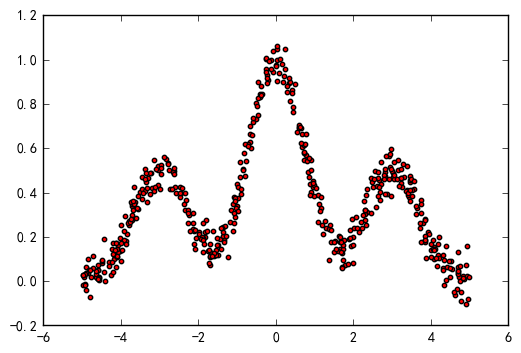

In [8]:
N = 500
x = np.random.rand(N) * 10 - 5  # [-5,5)
#    x = np.sort(x)
y = 0.5*np.exp(-(x+3) **2) + np.exp(-x**2) + + 0.5*np.exp(-(x-3) ** 2) + 0.05*np.random.randn(N)
x.shape = -1, 1
plt.scatter(x,y,c="r",s=10)
plt.show()


In [17]:
model1=Pipeline([('poly',PolynomialFeatures(degree=10)),("ridge",RidgeCV(alphas=np.linspace(-3,2,10),fit_intercept=False,cv=8))])
model1.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('ridge', RidgeCV(alphas=array([-3.     , -2.44444, -1.88889, -1.33333, -0.77778, -0.22222,
        0.33333,  0.88889,  1.44444,  2.     ]),
    cv=8, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))])

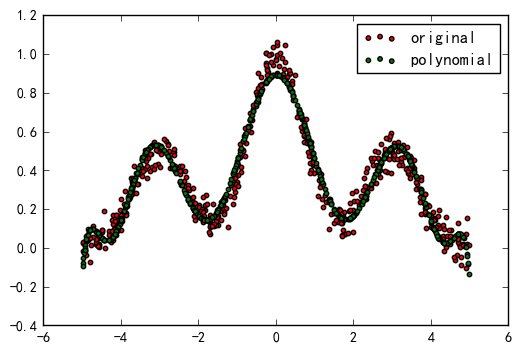

In [25]:
y_hat=model1.predict(x)
plt.scatter(x,y,c="r",s=10,label="original")
plt.scatter(x,y_hat,c="g",s=10,label="polynomial")
plt.legend(loc="best")
plt.show()

In [27]:
model2=BaggingRegressor(base_estimator=model1,n_estimators=10,max_samples=0.5)
model2.fit(x,y)

BaggingRegressor(base_estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('ridge', RidgeCV(alphas=array([-3.     , -2.44444, -1.88889, -1.33333, -0.77778, -0.22222,
        0.33333,  0.88889,  1.44444,  2.     ]),
    cv=8, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

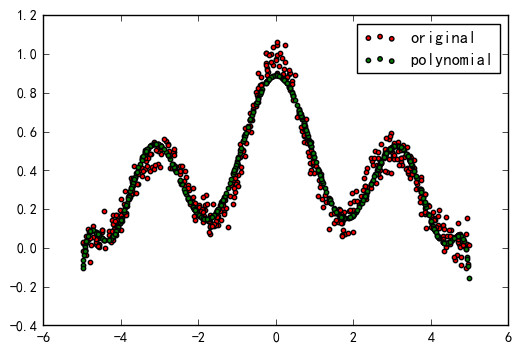

In [28]:
y_hat2=model2.predict(x)
plt.scatter(x,y,c="r",s=10,label="original")
plt.scatter(x,y_hat2,c="g",s=10,label="polynomial")
plt.legend(loc="best")
plt.show()

In [30]:
for i, (name, reg) in enumerate(regs):
    print i,name

0 DecisionTree Regressor
1 Ridge Regressor(6 Degree)
2 Bagging Ridge(6 Degree)
3 Bagging DecisionTree Regressor
